# Simulating Bipolar Flavor Oscillations with `NuGas`

## Huaiyu Duan (University of New Mexico)

## Introduction to the bipolar system

A bipolar neutrino system is a homogeneous and isotropic model with two groups of neutrinos in the two-flavor approximation. This model can be studied with the `nugas.f2i` package. `NuGas` represents the flavor content of a neutrino by it polarization vector $\mathbf{P}$. In the flavor basis, $\mathbf{P}=[0,0,1]$ represents a neutrino or antineutrino in the electron flavor, and $[0,0,-1]$ represents a neutrino or antineutrino in the other flavor which we call $x$. In the mass basis, these two polarization vectors represent the mass eigenstates $\nu_1$ and $\nu_2$, respectively. 

`NuGas` uses the flavor basis when the matter potential is set even it is 0 (see below) and the mass basis otherwise.

One can use the functions `f2m` and `m2f` to change a vector from the flavor basis to the mass basis and vice versa.

In [1]:
from nugas.misc import f2m, m2f

theta = 0.1 # mixing angle
P = [0, 0, 1] 
print("The polarization vector of the electron neutrino in the mass basis is ", f2m(P, theta))

The polarization vector of the electron neutrino in the mass basis is  [0.19866933 0.         0.98006658]


Let $\mathbf{P}^{(1)}$ and $\mathbf{P}^{(2)}$ represent the polarization vectors of the two neutrino groups in the bipolar system. Their flavor evolution can be solved from the following equation of motion (EoM):
$$ \frac{\mathrm{d}}{\mathrm{d} t}\mathbf{P}^{(a)} = (-\eta\omega_a\mathbf{B} + \lambda\mathbf{L} + \mu \mathbf{D})\times \mathbf{P}^{(a)}. $$
Here $\mathbf{B}$ is the mass axis (i.e. $[0,0,1]$ in the mass basis), $\mathbf{L}$ is the flavor axis. The mass ordering signature $\eta$ is defined to be $+1$ for the normal ordering (NO) and $-1$ for the inverted ordering (IO). The vacuum oscillation frequency $\omega=\pm|\delta m^2|/(-2E)$ is is postive for the neutrino and negative for the antineutrino. The strengths of the matter and neutrino background potentials are given by $\lambda=\sqrt2 G_\mathbf{F} n_e$ and $\mu=\sqrt2 G_\mathbf{F} n_\nu$, respectively, where $n_e$ is the net electron density, and $n_\nu$ is a characteristic neutrino density. The net polarization for the bipolar model is
$$ \mathbf{D}=g_1\mathbf{P}^{(1)}+g_2\mathbf{P}^{(2)},$$ 
where $g_a$ is the neutrino electron lepton number (ELN) which is positive for $\nu_e$ or $\bar\nu_x$ and negative for $\bar\nu_e$ or $\nu_x$. The definitions of $\mu$, $g_a$, and $\mathbf{P}^{(a)}$ are related. For definiteness, we normalize all the polarization vectors so that $|\mathbf{P}|=1$, and set $g_1=1$.

## First example

A bipolar model is defined as a `nugas.f2i.NuGas` object which accepts the following parameters during initialization:
- `omegas`: a list of vaccum oscillation frequencies. It is [1, -1] by default.
- `weights`: a list of weights for the polarization vectors. If not given, all elements are set to ±1 depending on the signs of omegas.
- `t_ini`: initial time. It is set to 0 by default.
- `P_ini`: an array of initial polarization vectors of shape (len(omegas), 3).They are set to in the electron flavor by default.
- `theta`: mixing angle.
- `imo`: whether the neutrino has the inverted mass order. Default is False.
- `Hmat`: a number or a function of a single argument t that gives the matter potential λ at time t. The polarization vectors are in the vacuum mass basis if it is None (default). Otherwise, they are in the flavor basis.
- `mu`: a number or a function of a single argument t that gives the neutrino potential μ at time t. It is 1 by default.
- `integrator`: SciPy integration method for time evolution. The default is "RK45".
- `int_kargs`: a dictionary of keyword arguments to be passed to the integrator. It is empty by default.

As the first example, we consider the bipolar system with a neutrino group and an antineutrino group of frequencies $\pm\omega_0$, respectively, both of which are in the electron flavor initially. We will measure everything in terms of $\omega_0$ by setting it to 1. We will create two models `bipolar_no` and `bipolar_io` with NO and IO, respectively.

In [2]:
from nugas.f2i import NuGas

# initialize the models
theta=0.1 # mixing angle
mu = 1 # neutrino self-coupling strength 
bipolar_no = NuGas(theta=theta, mu=mu) # normal mass ordering
bipolar_io = NuGas(imo=True, theta=theta, mu=mu) # inverted ordering

After creating a model, we call the member function `evolve(t)` of the `NuGas` object to compute the flavor evolution, where `t` is either a time or a list of time points which must be larger than the last time that the model has reached. After the evolution, `evolve()` returns the current time of the model and the polarization vector which is an array of the shape `(Nw, 3)` with `Nw = len(omegas)`. A list of the previous time points and the polarization vectors at those points can be accessed by the properties `t` (an array of shape `(Nt,)`) and `P` (of shape `(Nt, Nw, 3)`).

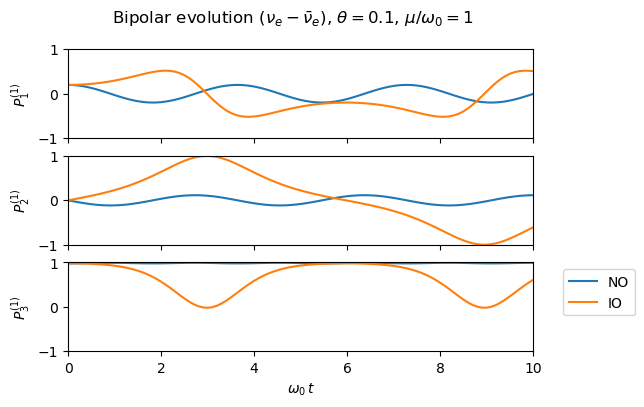

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# evolve the models
Nt = 101 # number of time points to store information
tt = np.linspace(0, 10, Nt)[1:] # time points to store the information, drop t=0
bipolar_no.evolve(tt)
bipolar_io.evolve(tt)

# make the plot
fig, ax = plt.subplots(3, 1, sharex=True, dpi=100)
for fi in range(3):
    ax[fi].plot(bipolar_no.t, bipolar_no.P[:,0, fi], label="NO") 
    ax[fi].plot(bipolar_io.t, bipolar_io.P[:,0, fi], label="IO") 
    ax[fi].set_ylabel(f'$P^{{(1)}}_{{{fi+1}}}$')
    ax[fi].set_ylim(-1, 1)
ax[-1].set_xlabel('$\omega_0\, t$')
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
fig.suptitle(fr'Bipolar evolution ($\nu_e-\bar{{\nu}}_e$), $\theta={theta}$, $\mu/\omega_0={mu}$')
plt.xlim(0, 10)
plt.show()

## Oscillation frequencies

When $\lambda=0$, the evolution of two bipolar systems with different $\omega_a$ but everything else the same are equivalent as long as they have the same frequency difference $\Delta \omega=\omega_1 - \omega_2$. In fact, one system can be tranformed to the other by going to a reference frame that rotates about $\mathbf{B}$ with frequency $\Delta \omega$ or $-\Delta \omega$ [[arXiv:astro-ph/0511275](https://arxiv.org/abs/astro-ph/0511275)].

The following example looks at two bipolar systems with $\omega$'s being $\omega_0$ and $3\omega_0$, respectively, and the second neutrino group starting as $\nu_x$ instead of $\bar{\nu}_e$. One can see that $P^{(a)}_3$ in this example are the same as that in the above example.

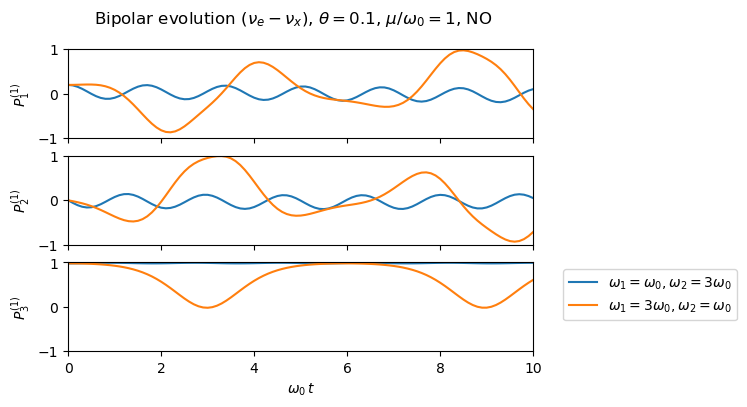

In [4]:
# initialize the models
theta = 0.1 # mixing angle
mu = 1 # neutrino self-coupling strength
Pe = f2m([0, 0, 1], theta) # polarization vector for nu_e in the mass basis
Px = f2m([0, 0, -1], theta) # nu_x
bipolar_31 = NuGas(omegas=(3, 1), weights=(1, 1), P_ini=(Pe, Px), theta=theta, mu=mu) # omega_1 = 3, omega_2 = 1
bipolar_13 = NuGas(omegas=(1, 3), weights=(1, 1), P_ini=(Pe, Px), theta=theta, mu=mu) # omega_1 = 1, omega_2 = 3

# evolve the models
Nt = 101 # number of time points to store information
tt = np.linspace(0, 10, Nt)[1:] # time points to store the information
bipolar_31.evolve(tt)
bipolar_13.evolve(tt)

# make the plot
fig, ax = plt.subplots(3, 1, sharex=True, dpi=100)
for fi in range(3):
    ax[fi].plot(bipolar_31.t, bipolar_31.P[:,0,fi], label="$\omega_1 = \omega_0, \omega_2=3\omega_0$") 
    ax[fi].plot(bipolar_13.t, bipolar_13.P[:,0,fi], label="$\omega_1 = 3\omega_0, \omega_2=\omega_0$") 
    ax[fi].set_ylim(-1, 1)
    ax[fi].set_ylabel(f'$P^{{(1)}}_{{{fi+1}}}$')
ax[-1].set_xlabel('$\omega_0\, t$')
plt.xlim(0, 10)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
fig.suptitle(fr'Bipolar evolution ($\nu_e-\nu_x$), $\theta={theta}$, $\mu/\omega_0={mu}$, NO')
plt.show()

## Density ratio

The following example shows how the ratio of the numbers of the two neutrino groups can affect the flavor oscillations. 

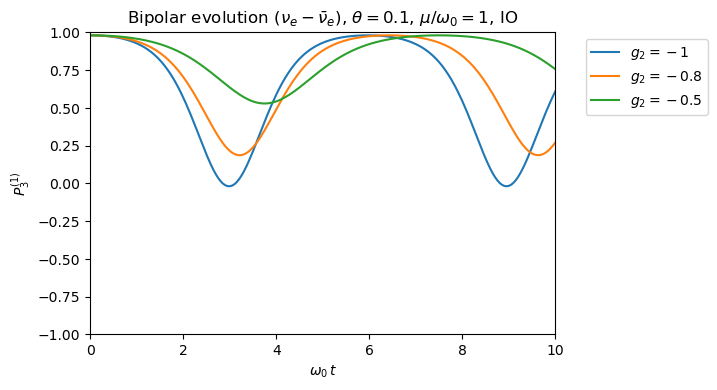

In [5]:
# initialize the models
theta = 0.1 # mixing angle
mu = 1 # neutrino self-coupling strength
g2s = [-1, -0.8, -0.5] # values of g2 to study
gas_a = [NuGas(weights=(1, g2), imo=True, mu=mu, theta=theta) for g2 in g2s] # list of models

# evolve the models
Nt = 201 # number of time points to store information
tt = np.linspace(0, 10, Nt)[1:] # time points to store the information
for model in gas_a:
    model.evolve(tt)

# make the plot
plt.figure(dpi=100)
for model, g2 in zip(gas_a, g2s):
    plt.plot(model.t, model.P[:,0,2], label=f"$g_2={g2}$") # plot P_3 of the neutrino
plt.xlabel('$\omega_0\, t$')
plt.ylabel('$P^{(1)}_{3}$')
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title(fr'Bipolar evolution ($\nu_e-\bar{{\nu}}_e$), $\theta={theta}$, $\mu/\omega_0={mu}$, IO')
plt.ylim(-1, 1)
plt.xlim(0, 10)
plt.show()

## Neutrino self-coupling strength

The following example compares the bipolar systems with various values of $\mu$.

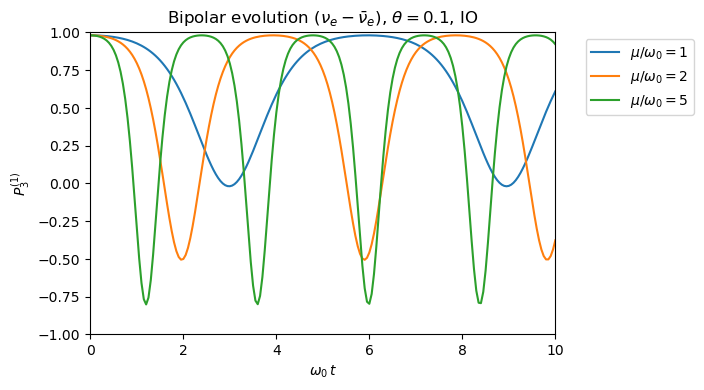

In [6]:
# initialize the models
theta = 0.1 # mixing angle
mus = [1, 2, 5] # values of mu to study
gas_mu = [NuGas(imo=True, mu=mu, theta=theta) for mu in mus] # list of models

# compute the models
Nt = 201 # number of time points to store information
tt = np.linspace(0, 10, Nt)[1:] # time points to store the information
for model in gas_mu:
    model.evolve(tt)

# make the plot
plt.figure(dpi=100)
for model, mu in zip(gas_mu, mus):
    plt.plot(model.t, model.P[:,0,2], label=f"$\mu/\omega_0={mu}$") # plot P_3 of the neutrino
plt.xlabel('$\omega_0\, t$')
plt.ylabel('$P^{(1)}_{3}$')
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title(fr'Bipolar evolution ($\nu_e-\bar{{\nu}}_e$), $\theta={theta}$, IO')
plt.ylim(-1, 1)
plt.xlim(0, 10)
plt.show()

## Matter potential

By default `NuGas` assumes there is no matter potential and works in the mass basis. The strength of the matter potential can be set through the parameter `Hmat`. In this case, `NuGas` will work in the flavor basis even if `Hmat` is 0.

The following example demonstrates the effect of the matter potential on collective neutrino oscillations. Unlike the MSW effect, the presence of a large matter potential delays but does not damp the collective oscillations [[astro-ph/0511275](https://arxiv.org/abs/astro-ph/0511275), [astro-ph/0608695](https://arxiv.org/abs/astro-ph/0608695)].

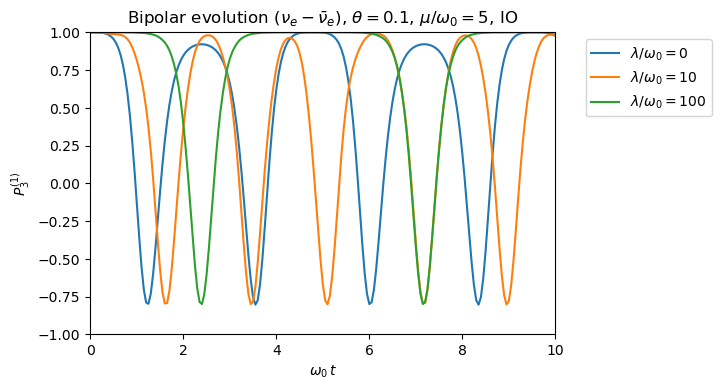

In [7]:
# initialize the models
theta = 0.1 # mixing angle
mu = 5 # neutrino self-coupling strength 
lams = [0, 10, 100] # values of lambda in units of omega_0
gas_mat = [NuGas(imo=True, theta=theta, mu=mu, Hmat=lam) for lam in lams] # list of models

# evolve the models
Nt = 401 # number of time points to store information
tt = np.linspace(0, 20, Nt)[1:] # time points to store the information
for model in gas_mat:
    model.evolve(tt)

# make the plot
plt.figure(dpi=100)
for model, lam in zip(gas_mat, lams):
    plt.plot(model.t, model.P[:,0,2], label=f"$\lambda/\omega_0={lam}$") # plot P_3 of the neutrino
plt.xlabel('$\omega_0\, t$')
plt.ylabel('$P^{(1)}_{3}$')
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title(fr'Bipolar evolution ($\nu_e-\bar{{\nu}}_e$), $\theta={theta}$, $\mu/\omega_0={mu}$, IO')
plt.ylim(-1, 1)
plt.xlim(0, 10)
plt.show()

## Varying potentials

Both $\lambda$ and $\mu$ can change with time. The following example demonstrates the evolution of matter-free bipolar systems with decreasing neutrino potentials $\mu(t)=2\mu_\mathrm{c}(1-\gamma t)$. Here $\mu_\mathrm{c}=2\omega_1/(1-\sqrt{\alpha})^2$ gives the critical neutrino density when the bipolar system with $\alpha =-g_2/g_1$ falls out of the sleeping top regime when $\mu$ decreases very slowly [[astro-ph/0608695](https://arxiv.org/abs/astro-ph/0608695), [arXiv:astro-ph/0703776](https://arxiv.org/abs/astro-ph/0703776)].

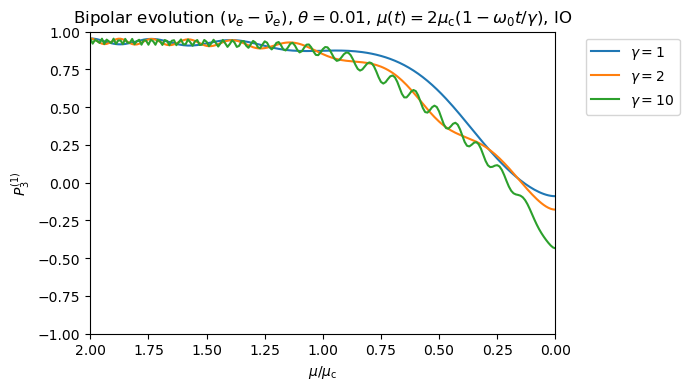

In [8]:
# factory function that generates mu(t)
def mu_factory(mu0, gamma):
    mu = lambda t: mu0 * (1 - t/gamma)
    return mu

# initialize the models
theta = 0.01 # mixing angle
alpha = 0.8 # -g2/g1
gammas = [1, 2, 10] # values of gamma to study
mu_crit = 2 / (1 - np.sqrt(alpha))**2 # critical density
mu0 = 2 * mu_crit # initial mu
mus = [mu_factory(mu0, gamma) for gamma in gammas] # list of mu functions
gas_var = [NuGas(weights=(1, -alpha), imo=True, mu=mu) for mu in mus] # list of models

# compute the models
Nt = 201 # number of time points to store information
for model, gamma in zip(gas_var, gammas):
    tt = np.linspace(0, gamma, Nt)[1:]
    model.evolve(tt)

# make the plot
plt.figure(dpi=100)
for model, gamma, mu in zip(gas_var, gammas, mus):
    plt.plot(mu(model.t)/mu_crit, model.P[:,0,2], label=f"$\gamma={gamma}$") # plot P_3 of the neutrino
plt.xlabel('$\mu/\mu_\mathrm{c}$')
plt.ylabel('$P^{(1)}_{3}$')
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title(fr'Bipolar evolution ($\nu_e-\bar{{\nu}}_e$), $\theta={theta}$, $\mu(t)=2\mu_\mathrm{{c}}(1 - \omega_0 t/\gamma)$, IO')
plt.ylim(-1, 1)
plt.xlim(2, 0)
plt.show()

## Acknowledgements

This material is based upon work supported by the U.S. Department of Energy, Office of Science, Office of Nuclear Physics under Award Number DE-SC-0017803.